# Analysis of Test Centuries made at Lord's Cricket Ground
***
There is no better feeling than watching a test match at the home of cricket itself - the iconic Lord's Cricket Ground! 

![Alt text](https://media-cdn.tripadvisor.com/media/photo-s/01/d0/a4/75/welcome-to-lords.jpg)

In this notebook, I want to analyse several aspects of these centuries and hopefully arrive at some conclusions!

Data was originally scraped from https://en.wikipedia.org/wiki/List_of_international_cricket_centuries_at_Lord's, and is included in the repo for your use!

## 0. Importing the Dependencies
***
I'm using __pandas__ library for easy conversion of CSV file to Dataframe Object, and __matplotlib__ to efficiently visualise my data.

In [161]:
#Import the libraries
import pandas as pd
import matplotlib.pyplot as plt

## 1. Taking a look at the data
***
It is important to know your data before working on it, so here we take a look at it.

There are 235 entries in the data, and the first 5 entries are displayed.

Notice that the attributes Score and Inns. have unformatted strings, but won't be using these attributes, so it is not an issue.

In [173]:
dataframe = pd.read_csv('Lords_Centuries.csv')

print ("Number of entries is " + str(len(dataframe)))

dataframe.head()     #Displays first 5 entries in the dataframe

Number of entries is 235


,No.,Score,Player,Team,Balls,Inns.,Opposing team,Date,Result
0,1,7003148000000000000♠ 148,"Steel, AllanAllan Steel",England,5000000000000000000♠ NR,2,Australia,000000001884-07-21-000021 July 1884,Won
1,2,7003164000000000000♠ 164,"Shrewsbury, ArthurArthur Shrewsbury (1/2)",England,5000000000000000000♠ NR,1,Australia,000000001886-07-19-000019 July 1886,Won
2,3,7003106000000000000♠ 106,"Shrewsbury, ArthurArthur Shrewsbury (2/2)",England,5000000000000000000♠ NR,1,Australia,000000001893-07-17-000017 July 1893,Drawn
3,4,7003107000000000000♠ 107,"Graham, HarryHarry Graham",Australia,5000000000000000000♠ NR,2,England,000000001893-07-17-000017 July 1893,Drawn
4,5,7003143000000000000♠ 143,"Trott, HarryHarry Trott",Australia,5000000000000000000♠ NR,3,England,000000001896-06-22-000022 June 1896,Lost


## 2. Centuries scored by each country
***
This is to visualise the number of centuries scored by each team at Lord's over the years.

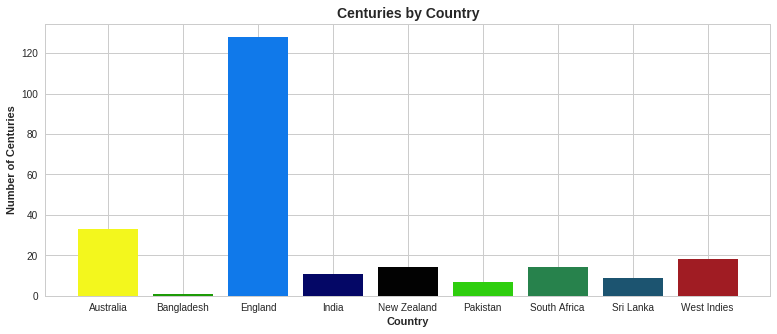

In [207]:
parameters = ['Team','No.']       #Parameters required are country name and the century number

temp = dataframe[parameters]      #Select the given attributes from the main dataframe

df = tmp.groupby(['Team'], as_index = False).count()    #Group by each team the count of centuries


x = [i for i in range(len(y))]    #For plotting, only numeric values can be passed to pyplot, hence a dummy array
y = df['No.']                     #As No. is numerical, it can be directly used for y-axis

Labels = df['Team']               #This is used to rename the labels in the plot to actual team names

plt.bar(x,y, color = ['#f3f71d', '#1d9b07', '#1079ea', '#040766', '#020202', '#2ece0e', '#27824c', '#1c5470', '#a01c23'])
plt.xticks(x, Labels)             #This renames the labels to the actual team names

fig_size = plt.rcParams["figure.figsize"]   #This adjusts height and width of the plot
fig_size[0] = 13
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.title("Centuries by Country", fontsize = 14, fontweight = "bold")
plt.xlabel("Country", fontweight = "bold")
plt.ylabel("Number of Centuries", fontweight = "bold")
plt.show()   

* Quite unsuprisingly, __England has the most number of centuries, while Bangladesh has the least__.
* Zimbabwe is not even on the list.
* Unexpectedly, **New Zealand and Windies have more centuries than India**.

## 3. Result when a home/away batsman scores a century
***
Here, I would like to compare the result of the game when an Englishman scores a century, and when a touring batsman does the same.

### a) Result when an away batsman scores a century

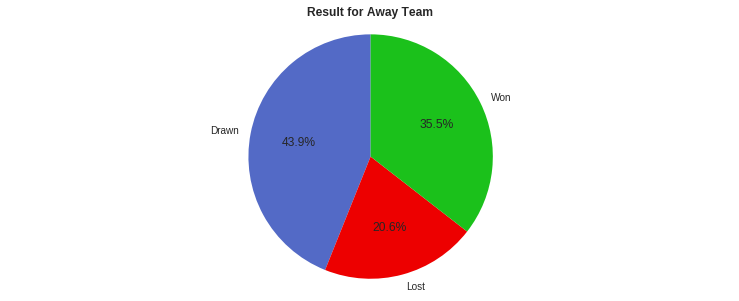

In [233]:
parameters = ['Team','Result']        #These are the parameters required

temp = dataframe[parameters]

temp = temp[temp.Team != "England"]    #Select all non-English records

df = temp.groupby(['Result'], as_index = False).count()    #Group by result(Drawn/Lost/Won)

total_matches = df['Team'].sum()    #Total matches playes

df.loc[df['Team']>0, 'Team'] = df.Team*100/total_matches    #This calculates the % of each category

sizes = df['Team'].values   
labels = df['Result'].values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors = ('#536ac6','#ed0000','#1bc11b'))
ax1.axis('equal')   #To obtain a circular pie chart
plt.title("Result for Away Team", fontweight = "bold")
plt.show()

### b) Result when an English batsman scores a century

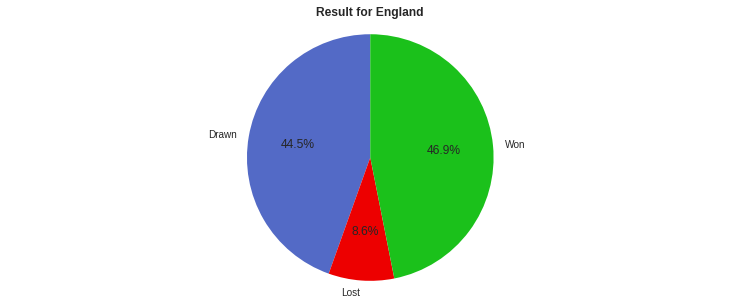

In [231]:
temp = dataframe[parameters]

temp = temp[temp.Team == "England"]    #Select all English centuries

df = temp.groupby(['Result'], as_index = False).count()    #Group by result 

total_matches = df['Team'].sum()    

df.loc[df['Team']>0, 'Team'] = df.Team*100/total_matches    #Calculate % of each result

sizes = df['Team'].values   
labels = df['Result'].values

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', startangle=90, colors = ('#536ac6','#ed0000','#1bc11b'))
ax1.axis('equal')
plt.title("Result for England", fontweight = "bold")
plt.show()

* __England is much more improbable to lose__ if one of their batsmen has got a century (__8.6%__ chance), than touring teams (__20.6%__ chance).
* For **England**, % of matches Won is even greater than % of matches Drawn, which means their batsmen score relatively __quicker tons__, as for **touring countries** Drawn % is much higher than Won % - implying **slower strike rates**.

## 4. Centuries by Innings
***
This will give better insight into the centuries scored in 1st, 2nd, 3rd and 4th innings.

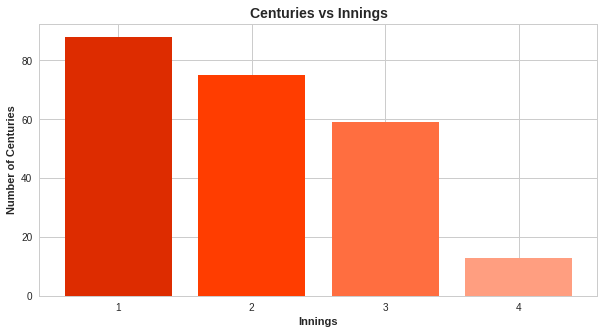

In [239]:
parameters = ['Inns.','No.']        #These are the parameters required

temp = dataframe[parameters]

df = temp.groupby(['Inns.'], as_index = False).count()    #Group by innings

x = (1,2,3,4)
y = df['No.']
plt.bar(x, y, color = ['#DD2C00', '#FF3D00', '#FF6E40', '#FF9E80'])

fig_size = plt.rcParams["figure.figsize"]   #This adjusts height and width of the plot
fig_size[0] = 5
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

plt.xticks([1,2,3,4])
plt.title("Centuries vs Innings", fontsize = 14, fontweight = "bold")
plt.xlabel("Innings", fontweight = "bold")
plt.ylabel("Number of Centuries", fontweight = "bold")
plt.show()   

* As number of centuries scored decreases with each innings, it can be said that the Lord's pitch gets **more difficult for batting** as the match goes on.
* The sharp decrease in 4th innnigs hundreds hints that either there aren't much runs to chase, or the temprament to score a ton in a chase is very rare.


### That's it for this notebook! I hope you enjoyed reading it!

### This was my first time at data analysis, so please feel free to suggest any improvements or errors that might have crept in!